# Test the model

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
# Load the saved model
model = tf.keras.models.load_model("handwritten_digit.keras")

In [23]:
# Define the path to the folder containing images
folder_path = 'numbers'
filename = '0.png'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The prediction is : 0


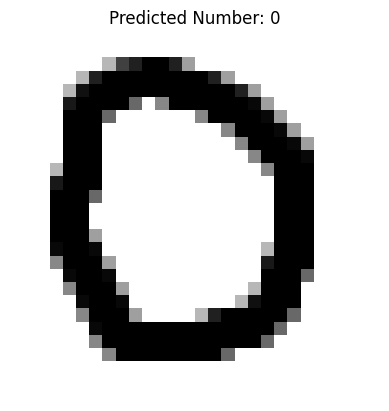

In [24]:
# Read the image in grayscale
img = cv.imread(os.path.join(folder_path, filename), cv.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img is None:
    raise ValueError(f"Error loading image: {filename}")

# Resize the image to 28x28 pixels if needed
img = cv.resize(img, (28, 28))

# Normalize the image
img = img / 255.0  # Normalize pixel values to the range [0, 1]

# Invert colors for normalized images
img = 1 - img  

# Expand dimensions to match model input shape (1, 28, 28, 1)
img = np.expand_dims(img, axis=-1)  
img = np.expand_dims(img, axis=0)   

# Make prediction
prediction = model.predict(img)

# Print the prediction
print(f'The prediction is : {np.argmax(prediction)}')

# Display the image
plt.imshow(np.squeeze(img), cmap=plt.cm.binary) 
plt.title(f'Predicted Number: {np.argmax(prediction)}')
plt.axis('off')  # Hide the axis
plt.show()